<a href="https://colab.research.google.com/github/kanishkraj-ops/Machine-Learning/blob/main/Teen_Phone_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I will be analysing a dataset on teen phone addiction and then make a model to predict maybe which teen is more likely to get bad marks based on their screen time**

In [1]:
#lets import required libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
teens = pd.read_csv('teen_phone_addiction_dataset.csv')
teens.head()

,Name,Age,Gender,Grade,Screen_Time,Social_Media_Usage,Gaming_Hours,Academic_Performance
0,Riya,14,Male,12th,9.9,7.1,2.3,59.9
1,Aarav,15,Other,12th,3.5,2.2,0.6,77.7
2,Meera,14,Male,9th,1.9,0.5,0.9,84.8
3,Kabir,17,Female,8th,8.3,4.8,1.4,62.4
4,Tanya,16,Male,11th,9.7,8.3,1.2,58.8


In [2]:
teens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  30 non-null     object 
 1   Age                   30 non-null     int64  
 2   Gender                30 non-null     object 
 3   Grade                 30 non-null     object 
 4   Screen_Time           30 non-null     float64
 5   Social_Media_Usage    30 non-null     float64
 6   Gaming_Hours          30 non-null     float64
 7   Academic_Performance  30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


In [3]:
teens.describe()

,Age,Screen_Time,Social_Media_Usage,Gaming_Hours,Academic_Performance
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.433333,5.113333,2.896667,1.113333,74.550000
std,1.546594,2.819481,2.377551,0.866516,10.754782
min,13.000000,1.700000,0.500000,0.000000,55.900000
25%,14.250000,2.200000,1.200000,0.525000,65.250000
50%,15.500000,5.000000,1.900000,0.850000,75.200000
75%,17.000000,7.425000,3.850000,1.375000,84.600000
max,18.000000,9.900000,9.100000,3.700000,90.600000


In [4]:
teens.isna().sum()

,0
Name,0
Age,0
Gender,0
Grade,0
Screen_Time,0
Social_Media_Usage,0
Gaming_Hours,0
Academic_Performance,0


In [5]:
teens.dtypes

,0
Name,object
Age,int64
Gender,object
Grade,object
Screen_Time,float64
Social_Media_Usage,float64
Gaming_Hours,float64
Academic_Performance,float64


In [6]:
teens["Grade"] = teens["Grade"].str.extract('(\d+)').astype(int)
teens

,Name,Age,Gender,Grade,Screen_Time,Social_Media_Usage,Gaming_Hours,Academic_Performance
0,Riya,14,Male,12,9.9,7.1,2.3,59.9
1,Aarav,15,Other,12,3.5,2.2,0.6,77.7
2,Meera,14,Male,9,1.9,0.5,0.9,84.8
3,Kabir,17,Female,8,8.3,4.8,1.4,62.4
4,Tanya,16,Male,11,9.7,8.3,1.2,58.8
5,Ishaan,13,Male,8,2.1,1.2,0.7,86.5
6,Neha,13,Female,11,7.2,3.1,0.9,65.4
7,Rahul,16,Other,10,1.7,0.8,0.8,90.6
8,Anaya,14,Other,10,4.6,2.7,1.4,80.2
9,Dev,16,Other,9,1.7,1.0,0.5,87.7


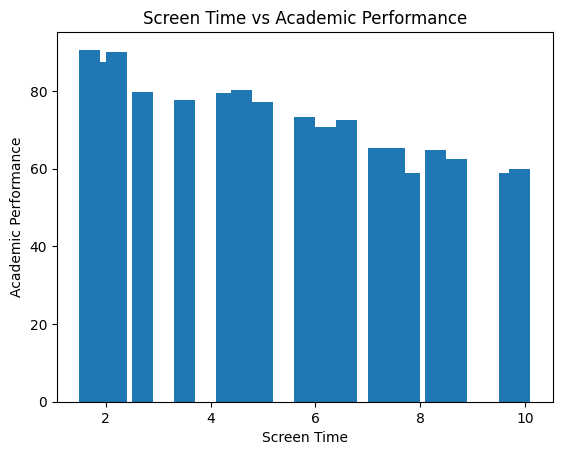

In [12]:
#plotting the data
fig,ax = plt.subplots()
graph = ax.bar(teens["Screen_Time"], teens["Academic_Performance"],width=0.4)
ax.set(xlabel="Screen Time",ylabel="Academic Performance",title="Screen Time vs Academic Performance");

In [13]:
#lets make the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = ["Screen_Time","Social_Media_Usage","Gaming_Hours"]
#splitting the data
X = teens[features]
y = teens["Academic_Performance"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [15]:
from sklearn.metrics import mean_absolute_error
preds = model.predict(X_test)
mean_absolute_error(y_test,preds)

2.9378333333333635

In [20]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [19]:
!pip install streamlit
!pip install joblib

In [22]:
import streamlit as st
import numpy as np
import joblib

# Load trained model
model = joblib.load("model.pkl")  # make sure this file exists in your project

st.title("📱 Teen Academic Performance Predictor")
st.write("Predict academic performance based on screen time habits.")

# User inputs for only the features used
screen_time = st.slider("Screen Time (hrs/day)", 0.0, 10.0, step=0.1)

if screen_time > 0:
    social_media = st.slider("Social Media Usage (hrs/day)", 0.0, screen_time, step=0.1)
    max_gaming = screen_time - social_media
    gaming = st.slider("Gaming Hours (hrs/day)", 0.0, max_gaming, step=0.1)
else:
    st.warning("Please select a screen time greater than 0.")
    social_media = 0.0
    gaming = 0.0

# Predict
if st.button("Predict Academic Score"):
    input_data = np.array([[screen_time, social_media, gaming]])
    prediction = model.predict(input_data)[0]
    st.success(f"🎓 Predicted Academic Performance: **{round(prediction, 2)} / 100**")


2025-07-07 17:06:13.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:06:13.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar